In [12]:
import dill
dill.load_session('notebook_env.db')

In [13]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=2)
gmm.fit(data_train[["meanfun","IQR"]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
clusters = gmm.predict(data_test[["meanfun","IQR"]])

In [30]:
aux= pd.DataFrame()
aux['X'] = data_test['meanfun']
aux['Y'] = data_test['IQR']
aux['C'] = clusters

In [31]:
def plot2d(data, label_suffix='', marker='o'):
    classes=sorted(data['C'].unique())
    for c in classes:
        plt.plot(data.where(data['C']==c).dropna().X.values,
                 data.where(data['C']==c).dropna().Y.values,'o', label=c, marker=marker, markersize=10)

    plt.axis('equal')

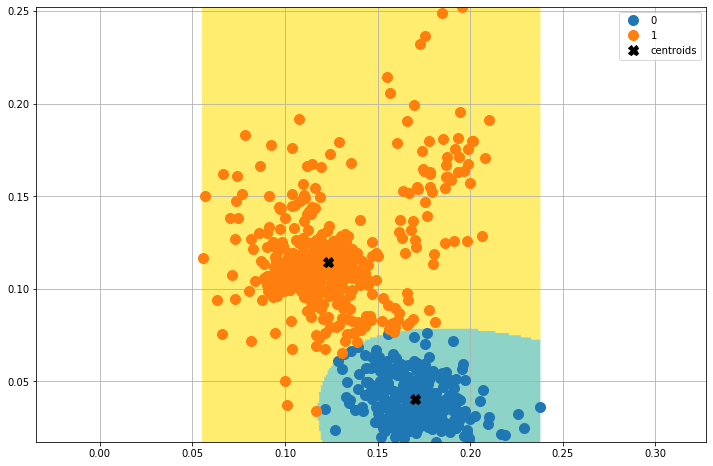

In [32]:
def plot_gmm_decision_boundary(data, gmm):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = gmm.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = gmm.means_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(aux,gmm)
plt.grid()
plt.legend()
plt.show()

In [ ]:
cluster_probabilities = gmm.predict_proba(aux[["X","Y"]])
uncertain = cluster_probabilities.max(1)<0.999 
plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(aux,gmm)
plt.scatter(aux['X'].values[uncertain],aux['Y'].values[uncertain],180,
                facecolors='none',edgecolors='k', label='uncertain p(x|z_k=1)<0.999)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
prob=gmm.predict(data_test[["meanfun","IQR"]])
prob=prob==0
test_gt=data_test["label"]
confusion_matrix(test_gt, prob)

In [ ]:
print("Clasisfication report \n",classification_report(test_gt,prob))

<h1>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
gmm = GMM(n_components=2)
gmm.fit(data_train.drop(columns="label"))
prob=gmm.predict(data_test.drop(columns="label"))
test_gt=data_test["label"]
confusion_matrix(test_gt, prob)

array([[333,  58],
       [367,  34]], dtype=int64)

In [34]:
print("Clasisfication report \n",classification_report(test_gt,prob))

Clasisfication report 
               precision    recall  f1-score   support

           0       0.48      0.85      0.61       391
           1       0.37      0.08      0.14       401

    accuracy                           0.46       792
   macro avg       0.42      0.47      0.37       792
weighted avg       0.42      0.46      0.37       792



<h1> Without outliers

In [35]:
gmm = GMM(n_components=2)
gmm.fit(data_clean_train[["meanfun","IQR"]])
clusters = gmm.predict(data_clean_test[["meanfun","IQR"]])
print("Clasisfication report \n",classification_report(data_clean_test.label,clusters))

Clasisfication report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       382
           1       0.99      0.94      0.96       350

    accuracy                           0.97       732
   macro avg       0.97      0.96      0.97       732
weighted avg       0.97      0.97      0.97       732



In [37]:
aux= pd.DataFrame()
aux['X'] = data_clean_test['meanfun']
aux['Y'] = data_clean_test['IQR']
aux['C'] = clusters

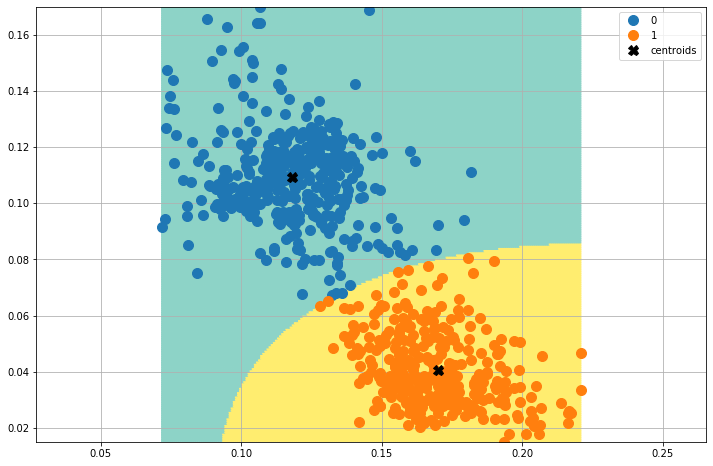

In [38]:
plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(aux,gmm)
plt.grid()
plt.legend()
plt.show()

In [39]:
gmm = GMM(n_components=2)
gmm.fit(data_clean_train.drop(columns="label"))
clusters = gmm.predict(data_clean_test.drop(columns="label"))
print("Clasisfication report \n",classification_report(data_clean_test.label,clusters))

Clasisfication report 
               precision    recall  f1-score   support

           0       0.51      0.88      0.64       382
           1       0.31      0.06      0.10       350

    accuracy                           0.49       732
   macro avg       0.41      0.47      0.37       732
weighted avg       0.41      0.49      0.38       732



In [40]:
dill.dump_session('notebook_env.db')